### Week-2 assignment: Machine Learning & Data Mining 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Load dataset
df = pd.read_csv('./floor/IBM.txt', delimiter = " ")
print("Number of rows in original data: {}\n"
      .format(len(df.index)))
print(df.head(10))

Number of rows in original data: 3692

         Date        Open        High        Low       Close    Volume  \
0  2007-01-03   97.180000   98.400002  96.260002   97.269997   9196800   
1  2007-01-04   97.250000   98.790001  96.879997   98.309998  10524500   
2  2007-01-05   97.599998   97.949997  96.910004   97.419998   7221300   
3  2007-01-08   98.500000   99.500000  98.349998   98.900002  10340000   
4  2007-01-09   99.080002  100.330002  99.070000  100.070000  11108200   
5  2007-01-10   98.500000   99.050003  97.930000   98.889999   8744800   
6  2007-01-11   99.000000   99.900002  98.500000   98.650002   8000700   
7  2007-01-12   98.989998   99.690002  98.500000   99.339996   6636500   
8  2007-01-16   99.400002  100.839996  99.300003  100.820000   9602200   
9  2007-01-17  100.690002  100.900002  99.900002  100.019997   8200700   

    Adjusted  
0  63.127567  
1  63.802544  
2  63.224930  
3  64.185463  
4  64.944771  
5  64.178978  
6  64.023201  
7  64.471024  
8  65.43150

### Q1:  Quality of data

In [4]:
# count the null or None values in each column and display by frequency
total_null = df.isnull().sum().sort_values(ascending=False)
print("Number of Null or None values in data: \n{}\n"
      .format(total_null))

# delete the rows containing missing values
df_processed = df.dropna(axis=0)

print("Number of datapoints in original data              : {}"
      .format(len(df.index)))
print("Number of datapoints after removing missing values : {}"
      .format(len(df_processed.index)))




Number of Null or None values in data: 
Date        0
Open        0
High        0
Low         0
Close       0
Volume      0
Adjusted    0
dtype: int64

Number of datapoints in original data              : 3692
Number of datapoints after removing missing values : 3692


### 2. Summarize the values

            Date        Open        High         Low       Close    Volume  \
0     2007-01-03   97.180000   98.400002   96.260002   97.269997   9196800   
1     2007-01-04   97.250000   98.790001   96.879997   98.309998  10524500   
2     2007-01-05   97.599998   97.949997   96.910004   97.419998   7221300   
3     2007-01-08   98.500000   99.500000   98.349998   98.900002  10340000   
4     2007-01-09   99.080002  100.330002   99.070000  100.070000  11108200   
...          ...         ...         ...         ...         ...       ...   
3687  2021-08-25  139.919998  140.800003  139.460007  139.860001   2012800   
3688  2021-08-26  139.970001  140.800003  138.710007  138.779999   2498700   
3689  2021-08-27  138.710007  139.589996  138.399994  139.410004   2459500   
3690  2021-08-30  139.500000  139.880005  138.820007  138.970001   1995500   
3691  2021-08-31  139.539993  140.940002  138.949997  140.339996   4233900   

        Adjusted  
0      63.127567  
1      63.802544  
2     

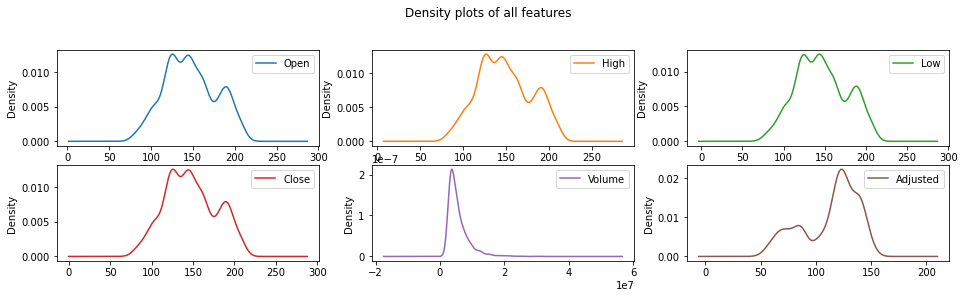

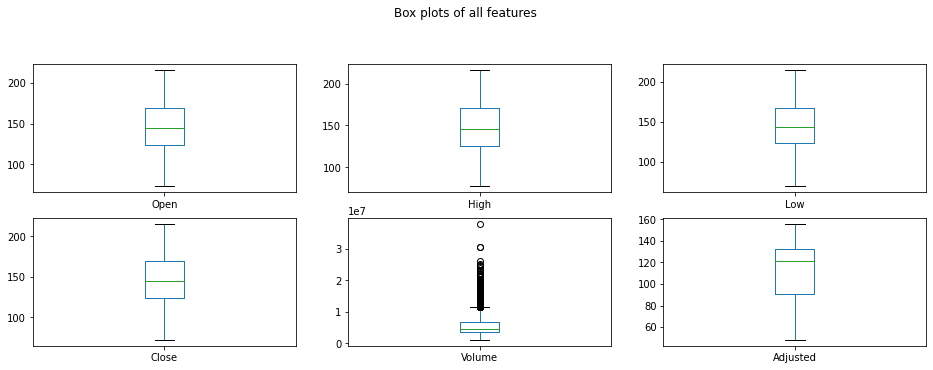

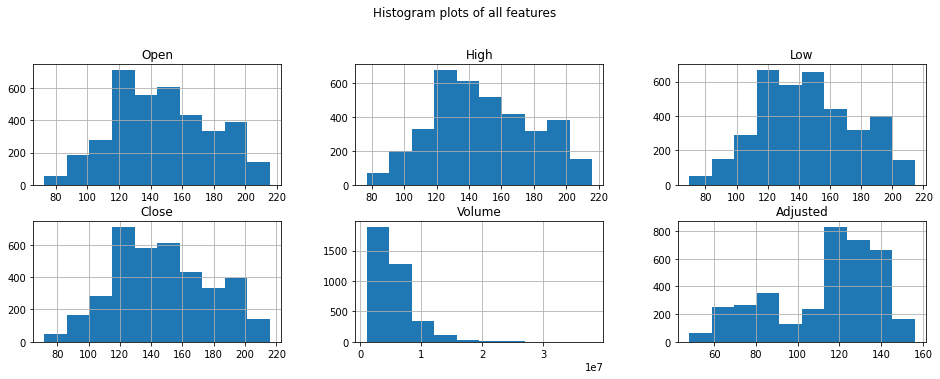

Text(0.5, 0.98, 'Pair wise plot of all features')

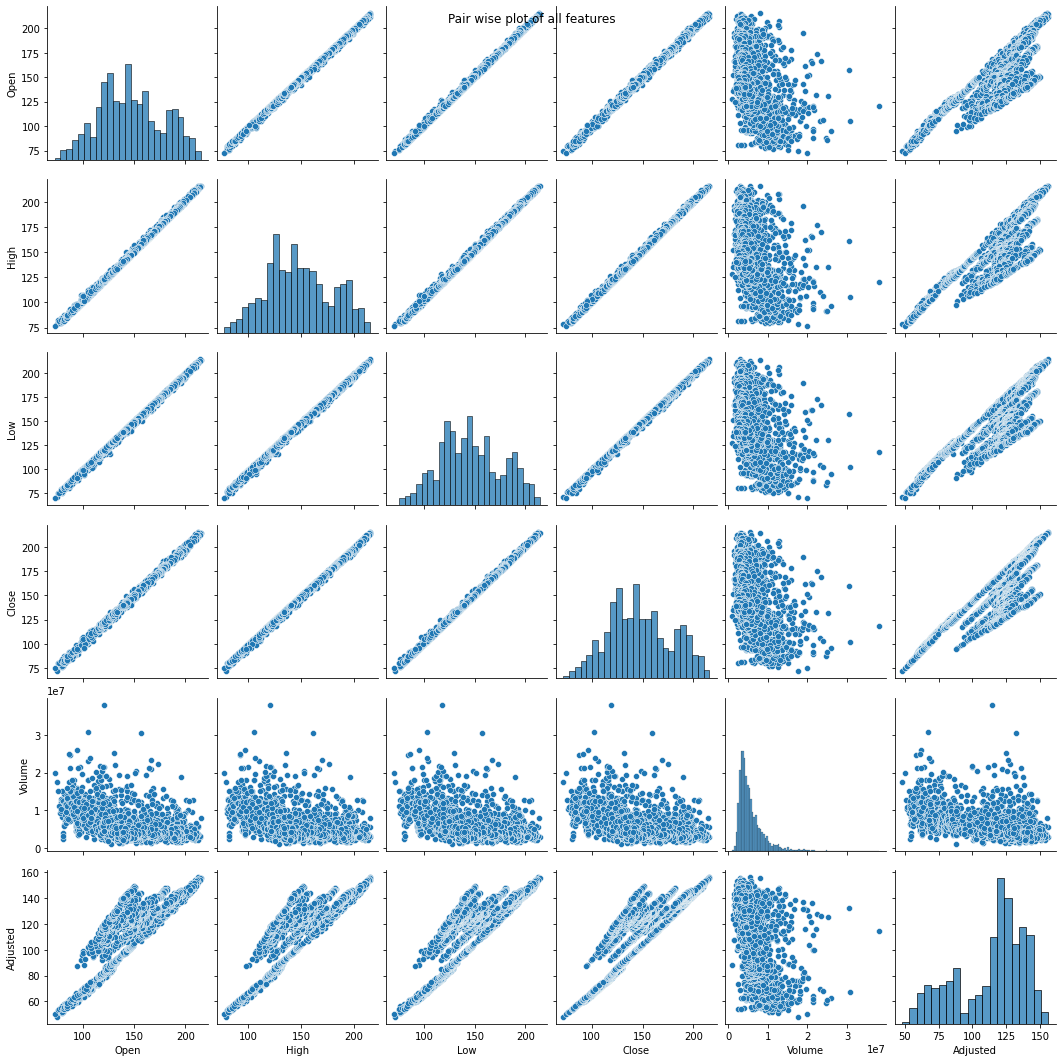

In [5]:
# Summarization of processed data
#df_processed = 
df_processed.describe() 
print(df_processed)

df_processed.plot(kind='density', subplots=True, layout=(3,3),     #subplot, plotting individual graphs for each column
                  title='Density plots of all features',
                  sharex=False,  figsize=(16,6))
plt.show()


df_processed.plot(kind='box', subplots=True, layout=(3,3), 
                  title='Box plots of all features',
                  sharex=False, sharey=False,  figsize=(16,8))
plt.show()

df_processed.hist(figsize=(16,8), layout=(3,3))
plt.suptitle("Histogram plots of all features")
plt.show()


g = sns.pairplot(df_processed)
g.fig.suptitle("Pair wise plot of all features") 


### 3. Summarize the Volume

Sorted dataframe by volume: 

            Date        Open        High         Low       Close    Volume  \
3538  2021-01-22  120.699997  120.699997  117.360001  118.610001  38063500   
106   2007-06-06  105.500000  105.510002  102.389999  102.410004  30770700   
2718  2017-10-18  157.119995  161.229996  156.949997  159.529999  30490200   
11    2007-01-19   95.000000   96.849998   94.550003   96.169998  26035800   
3466  2020-10-08  130.860001  135.500000  129.770004  131.490005  25288900   

        Adjusted  
3538  114.435143  
106    66.923210  
2718  132.191544  
11     62.413712  
3466  125.048523  


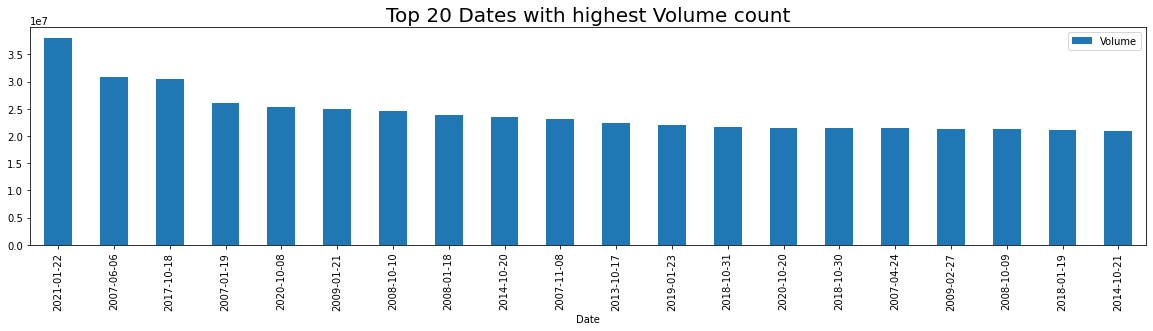

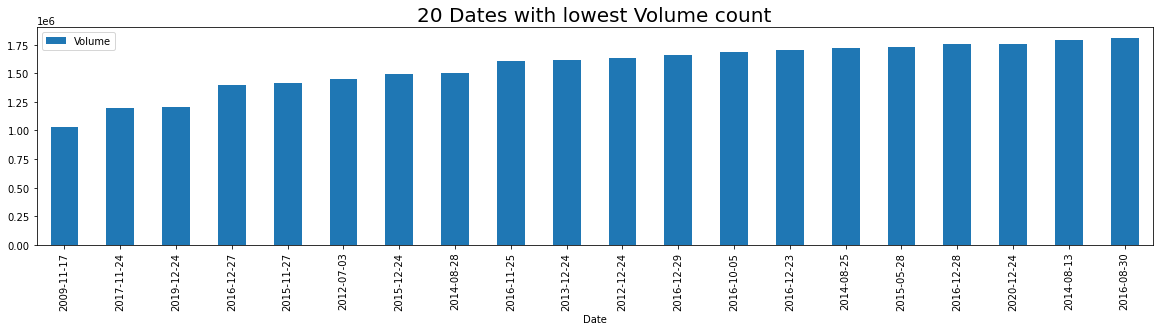

c:\users\veda\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Volume', ylabel='Density'>

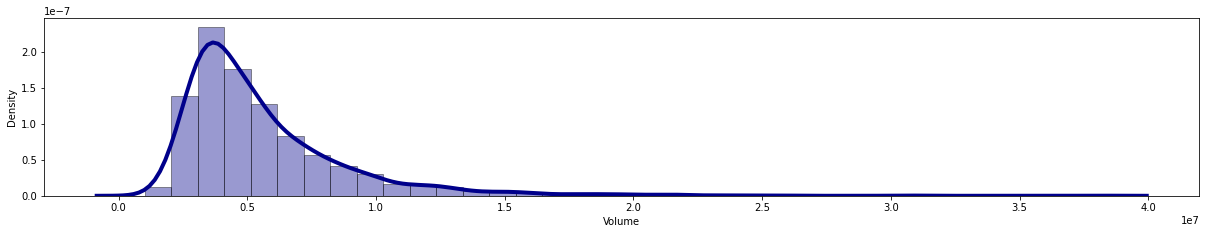

In [6]:
sorted_dates_by_volume = df_processed.sort_values(['Volume'], 
                                                  ascending = False)
print("Sorted dataframe by volume: \n\n{}"
      .format(sorted_dates_by_volume.head(5)))

ax = sorted_dates_by_volume.head(20).plot(y='Volume', 
    x='Date', kind = 'bar',
    title='Top 20 Dates with highest Volume count', 
    figsize=(20,4))
ax.axes.title.set_size(20)

ax= sorted_dates_by_volume.tail(20)[::-1].plot(y='Volume', 
       x='Date', kind = 'bar', 
    title='20 Dates with lowest Volume count', figsize=(20,4))
ax.axes.title.set_size(20)
plt.show()


fig, ax = plt.subplots()
fig.set_size_inches(20.7, 3.27)
sns.distplot(df_processed['Volume'], hist = True, kde=True, bins=int(180/5),
             color='darkblue', hist_kws={'edgecolor':'black'},kde_kws={'linewidth':4})

### 4. Degree of Variation or Volatility

 ###  Volatility of data  is often measured as the  either the standard deviation of the stock price over a given time range.
 
 ### This metric reflects the average amount a stock's price has differed from the mean over a period of time

In [7]:
### we calculate the volatility of stock for each year 

def volatility(dff):
    std = dff['Close'].std()
    mean = dff['Close'].mean()
    return mean, std


for year in range(2007, 2022):
    df_year = df_processed[pd.DatetimeIndex(df_processed['Date']).year == year]
    mean, std = volatility(df_year)
    print("Year: {}, No. of rows: {}, Mean price: {:.1f},"
        " Volatility(STDDev.): {:.1f}".format(year, len(df_year), mean, std))
    
    


Year: 2007, No. of rows: 251, Mean price: 105.8, Volatility(STDDev.): 7.7
Year: 2008, No. of rows: 253, Mean price: 110.0, Volatility(STDDev.): 16.4
Year: 2009, No. of rows: 252, Mean price: 109.3, Volatility(STDDev.): 13.9
Year: 2010, No. of rows: 252, Mean price: 131.9, Volatility(STDDev.): 7.2
Year: 2011, No. of rows: 252, Mean price: 170.9, Volatility(STDDev.): 10.7
Year: 2012, No. of rows: 250, Mean price: 196.6, Volatility(STDDev.): 7.1
Year: 2013, No. of rows: 252, Mean price: 194.1, Volatility(STDDev.): 11.2
Year: 2014, No. of rows: 252, Mean price: 182.3, Volatility(STDDev.): 11.5
Year: 2015, No. of rows: 252, Mean price: 155.4, Volatility(STDDev.): 11.6
Year: 2016, No. of rows: 252, Mean price: 150.5, Volatility(STDDev.): 11.8
Year: 2017, No. of rows: 251, Mean price: 157.7, Volatility(STDDev.): 12.1
Year: 2018, No. of rows: 251, Mean price: 143.9, Volatility(STDDev.): 13.7
Year: 2019, No. of rows: 252, Mean price: 137.0, Volatility(STDDev.): 6.2
Year: 2020, No. of rows: 253,

### 5. Compute a new data series corresponding to the daily return 

In [8]:
# Daily returns column in percentage

df_processed['Daily_returns'] = 100*((df_processed['Close'] - df_processed['Close'].shift())
                               / df_processed['Close'].shift())
print(df_processed.head(10))

         Date        Open        High        Low       Close    Volume  \
0  2007-01-03   97.180000   98.400002  96.260002   97.269997   9196800   
1  2007-01-04   97.250000   98.790001  96.879997   98.309998  10524500   
2  2007-01-05   97.599998   97.949997  96.910004   97.419998   7221300   
3  2007-01-08   98.500000   99.500000  98.349998   98.900002  10340000   
4  2007-01-09   99.080002  100.330002  99.070000  100.070000  11108200   
5  2007-01-10   98.500000   99.050003  97.930000   98.889999   8744800   
6  2007-01-11   99.000000   99.900002  98.500000   98.650002   8000700   
7  2007-01-12   98.989998   99.690002  98.500000   99.339996   6636500   
8  2007-01-16   99.400002  100.839996  99.300003  100.820000   9602200   
9  2007-01-17  100.690002  100.900002  99.900002  100.019997   8200700   

    Adjusted  Daily_returns  
0  63.127567            NaN  
1  63.802544       1.069190  
2  63.224930      -0.905300  
3  64.185463       1.519199  
4  64.944771       1.183011  
5  64

### 6. Model for the distribution of the closing price of your data and the daily return?

### We model the data as the Gaussian distibution with the emperical mean and standard deviation.

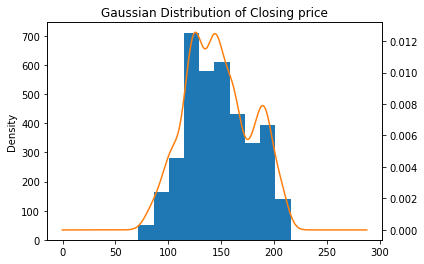

In [9]:
ax = df_processed['Close'].plot(kind='hist')
df_processed['Close'].plot(kind='kde', ax=ax, secondary_y=True)

plt.title("Gaussian Distribution of Closing price")
plt.show()


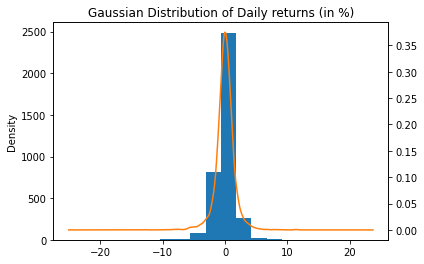

In [10]:
ax = df_processed['Daily_returns'].plot(kind='hist')
df_processed['Daily_returns'].plot(kind='kde', ax=ax, secondary_y=True)

plt.title("Gaussian Distribution of Daily returns (in %)")
plt.show()

### WEEK 2 ,Problem 1: Analyzing the relationship between the daily returns and the value of one feature.

### Q1. Do we see a strong correlation?

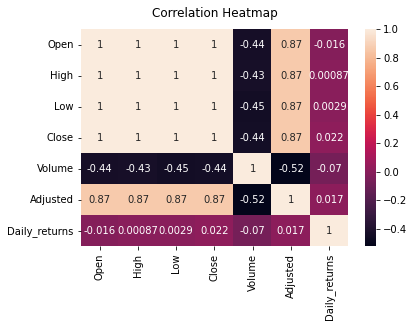

In [11]:
#correlation of all features

heat_map = sns.heatmap(df_processed.corr(), annot=True);
heat_map.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


### Q2. Generating new feature

In [14]:
# Creating new "Decision" feature with Up, Down, Flat values

conditions = [(df_processed['Daily_returns'] > 0.005),(df_processed['Daily_returns'] < -0.005), 
              (df_processed['Daily_returns'] < 0.005) & (df_processed['Daily_returns'] > -0.005)]

values = ['Up', 'Down', 'Flat']
df_processed['Decision'] = np.select(conditions, values)
print(df_processed)
print("\n")
print("Length of Up values in Decision column", len(df_processed.loc[df_processed['Decision'] == 'Up' ]))
print("Length of Down values in Decision column", len(df_processed.loc[df_processed['Decision'] == 'Down' ]))
print("Length of Flat values in Decision column", len(df_processed.loc[df_processed['Decision'] == 'Flat' ]))
#heat_map = sns.heatmap(df_processed.corr(), annot=True);
#heat_map.set_title('Correlation Heatmap including Decision column', fontdict={'fontsize':12}, pad=12);


            Date        Open        High         Low       Close    Volume  \
0     2007-01-03   97.180000   98.400002   96.260002   97.269997   9196800   
1     2007-01-04   97.250000   98.790001   96.879997   98.309998  10524500   
2     2007-01-05   97.599998   97.949997   96.910004   97.419998   7221300   
3     2007-01-08   98.500000   99.500000   98.349998   98.900002  10340000   
4     2007-01-09   99.080002  100.330002   99.070000  100.070000  11108200   
...          ...         ...         ...         ...         ...       ...   
3687  2021-08-25  139.919998  140.800003  139.460007  139.860001   2012800   
3688  2021-08-26  139.970001  140.800003  138.710007  138.779999   2498700   
3689  2021-08-27  138.710007  139.589996  138.399994  139.410004   2459500   
3690  2021-08-30  139.500000  139.880005  138.820007  138.970001   1995500   
3691  2021-08-31  139.539993  140.940002  138.949997  140.339996   4233900   

        Adjusted  Daily_returns Decision  
0      63.127567    

### Q3. which daily return pattern implies the presence of a given pattern?

From the above Decision pattern I observed that there are 1894 Daily return values are above 0.005 out of 3692. 1785 Daily return values are below -0.005 and only 12 Daily return values are present in between below 0.005 and and above -0.005

## Problem 2. Titanic Dataset

In [186]:
# Load titanic dataset

titanic = pd.read_csv('./titanic.csv')
print("Number of rows in original data: {}\n".format(len(titanic.index)))
print("Features present in dataset: ", titanic.columns)
print(titanic.head(10))

Number of rows in original data: 887

Features present in dataset:  Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')
   Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   
5         0       3                                    Mr. James Moran   
6         0       1                             Mr. Timothy J McCarthy   
7         0       3                      Master. Gosta Leonard Palsson   
8         1       3   Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson   
9         1       2                 Mrs. Nicholas

### Q1.  relationship between predictors(class, age ) and surviva

Basing on below two plots, i observed that as compare to other classes in class 3 there are large number of people not survived approximately 360. only 150 members survived in class 3. In class 2 survived and not survived rate around 90 persons. Large number of people survived in class 1 then remaining classes total 140 members survived and only 70 people are not survived 

Between the age 15 to 50 large number of people survived then other ages, and large number of people not surived in the same group. Below 1 year most of the people survived. and above age 77 most of the people not survived 

Text(0, 0.5, 'Survived people')

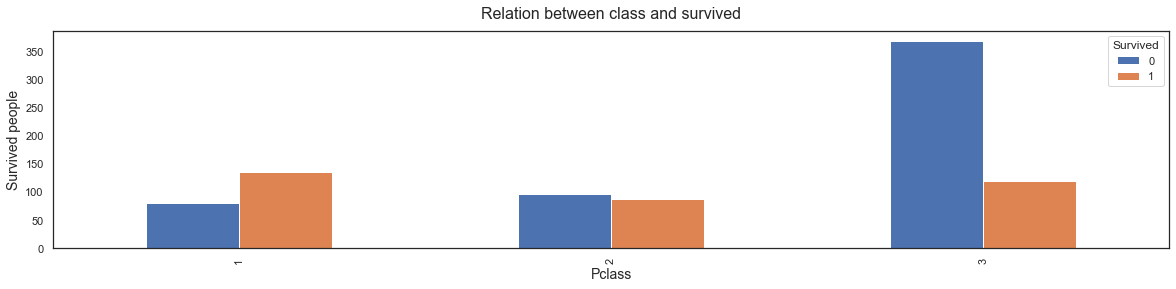

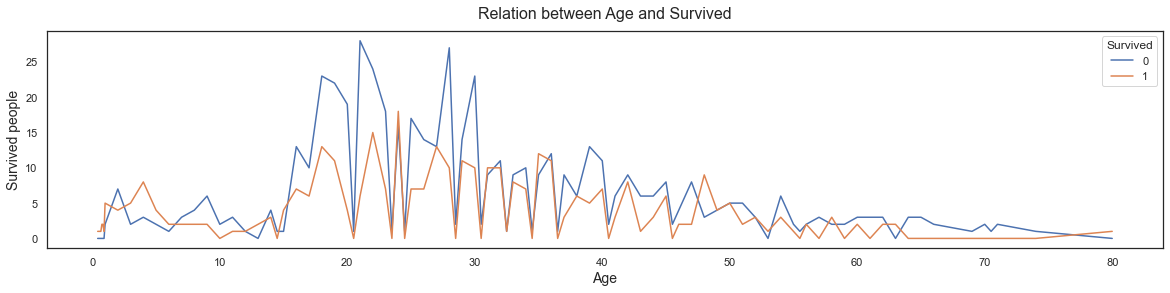

In [228]:
# Relationship between (Pclass, age) and suvival
df = titanic[[ 'Age', 'Pclass', 'Survived',]]

class_plot = pd.crosstab(df['Pclass'],df['Survived']).plot.bar(figsize=(20,4))
class_plot.set_title('Relation between class and survived',fontdict={'fontsize':16}, pad=12)
class_plot.set_xlabel('Pclass',fontdict={'fontsize':14})
class_plot.set_ylabel('Survived people',fontdict={'fontsize':14})

age_plot = pd.crosstab(df['Age'],df['Survived']).plot(figsize=(20,4))
age_plot.set_title('Relation between Age and Survived',fontdict={'fontsize':16}, pad=12)
age_plot.set_xlabel('Age',fontdict={'fontsize':14})
age_plot.set_ylabel('Survived people',fontdict={'fontsize':14})


### Q2. Survival rate of women

In [133]:
# Survival rate of women

female = titanic[titanic['Sex']=='female']
print("Number of womens present in titanic", len(female),"\n")

female_survived = women[women['Survived'] == 1]
print("{} females survived out of {}".format(len(female_survived), len(female)))
print("not survived rate of women", (len(female_survived)/len(female))*100,"\n")


female_not_survived = women[women['Survived'] == 0]
print("{} females not_survived out of {}".format(len(female_not_survived), len(female)))
print("not survived rate of women", (len(female_not_survived)/len(female))*100)

Number of womens present in titanic 314 

233 females survived out of 314
not survived rate of women 74.20382165605095 

81 females not_survived out of 314
not survived rate of women 25.796178343949045


### Q3. variation of survival rate based on number of siblings the passenger had on the ship

In [183]:
# Variation of survival rate based on siblings

unique_siblings = titanic['Siblings/Spouses Aboard'].unique()
print("Unique siblings present in titanic ", unique_siblings, "\n")
total_survived = titanic[titanic['Survived'] == 1]
print("Total {} people survived out of {} members".format(len(total_survived), len(titanic)),"\n")

arr_survival = []
for i in unique_siblings:
    
    titanic_i = titanic[titanic['Siblings/Spouses Aboard'] == i]
    #print(titanic_i)
    survived_i = titanic_i[titanic_i['Survived'] == 1]
    survived_rate_i = (len(survived_i)/len(titanic_i))*100
    print("Number of siblings: {}, the survival rate is {:.2f}%".format(i,survived_rate_i))    
    arr_survival.append(survived_rate_i)

print("\n")
arr_survival= np.array(arr_survival)
print("Mean of surivival rate for varying no. of siblings: {:.2f}% ".format(arr_survival.mean()))
print("Standard deviation of survival rates for varying no. of sibling: {:.2f}%".format(arr_survival.std()))

    


Unique siblings present in titanic  [1 0 3 4 2 5 8] 

Total 342 people survived out of 887 members 

Number of siblings: 1, the survival rate is 53.59%
Number of siblings: 0, the survival rate is 34.77%
Number of siblings: 3, the survival rate is 25.00%
Number of siblings: 4, the survival rate is 16.67%
Number of siblings: 2, the survival rate is 46.43%
Number of siblings: 5, the survival rate is 0.00%
Number of siblings: 8, the survival rate is 0.00%


Mean of surivival rate for varying no. of siblings: 25.21% 
Standard deviation of survival rates for varying no. of sibling: 19.61%
Variance of survival rates for varying no. of sibling: 384.44%


### Q4. variation of survival rate based on number of parents/children the passenger had on the ship

In [184]:
# Variation of survival rate based on siblings

unique_parents_child = titanic['Parents/Children Aboard'].unique()
print("Unique parents/children present in titanic ", unique_parents_child, "\n")
total_survived = titanic[titanic['Survived'] == 1]
print("Total {} people survived out of {} members".format(len(total_survived), len(titanic)),"\n")

arr_survival = []
for i in unique_parents_child:
    
    titanic_i = titanic[titanic['Parents/Children Aboard'] == i]
    #print(titanic_i)
    survived_i = titanic_i[titanic_i['Survived'] == 1]
    survived_rate_i = (len(survived_i)/len(titanic_i))*100
    print("Number of parents/children: {}, the survival rate is {:.2f}%".format(i,survived_rate_i))    
    arr_survival.append(survived_rate_i)

print("\n")
arr_survival= np.array(arr_survival)
print("Mean of surivival rate for varying no. of parents/children: {:.2f}% ".format(arr_survival.mean()))
print("Standard deviation of survival rates for varying no. of parents/children: {:.2f}%".format(arr_survival.std()))


Unique parents/children present in titanic  [0 1 2 5 3 4 6] 

Total 342 people survived out of 887 members 

Number of parents/children: 0, the survival rate is 34.57%
Number of parents/children: 1, the survival rate is 55.08%
Number of parents/children: 2, the survival rate is 50.00%
Number of parents/children: 5, the survival rate is 20.00%
Number of parents/children: 3, the survival rate is 60.00%
Number of parents/children: 4, the survival rate is 0.00%
Number of parents/children: 6, the survival rate is 0.00%


Mean of surivival rate for varying no. of parents/children: 31.38% 
Standard deviation of survival rates for varying no. of parents/children: 23.41%
